<a href="https://colab.research.google.com/github/Piyaphum/Mushroom-Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ChuVP8W4QDDhdjbvtb_Mv-U1zoUz_-wf' -O mushrooms.csv

--2024-12-25 04:10:02--  https://docs.google.com/uc?export=download&id=1ChuVP8W4QDDhdjbvtb_Mv-U1zoUz_-wf
Resolving docs.google.com (docs.google.com)... 108.177.97.139, 108.177.97.138, 108.177.97.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ChuVP8W4QDDhdjbvtb_Mv-U1zoUz_-wf&export=download [following]
--2024-12-25 04:10:02--  https://drive.usercontent.google.com/download?id=1ChuVP8W4QDDhdjbvtb_Mv-U1zoUz_-wf&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [application/octet-stream]
Saving to: ‘mushrooms.csv’

mushrooms.csv       100%[===================>] 365.24K  --.-KB/s    in 

In [ ]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


**เรียกดู shape ของ dataset ที่เอามา**

In [ ]:
df.shape

(8124, 23)

ดูว่ามีข้อมูลซ้ำกันหรือไม่

In [ ]:
df[df.duplicated(keep=False)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


**ดูค่า null ของ dataset**

In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


**plot กราฟดูว่าอันไหนกินได้หรือเป็นพิษ**
e คือกินได้ (Edible) และ
p คือเป็นพิษกินไม่ได้ (Poisonous)

<Axes: xlabel='class', ylabel='count'>

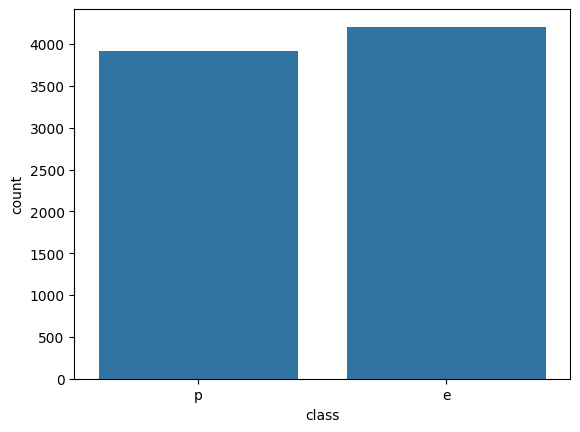

In [ ]:
sns.countplot(x=df['class'])

*จากกราฟจะพบว่าส่วนใหญ่เห็ดที่กินได้จะมีเยอะกว่าเห็ดพิษที่เราไม่สามารถกินได้นั่นเอง*

**plot กราฟ poisonous (p) และ edible (e)**
เพื่อดูว่าสีไหนรูปทรงไหนกินได้หรือกินไม่ได้




<Figure size 1400x600 with 0 Axes>

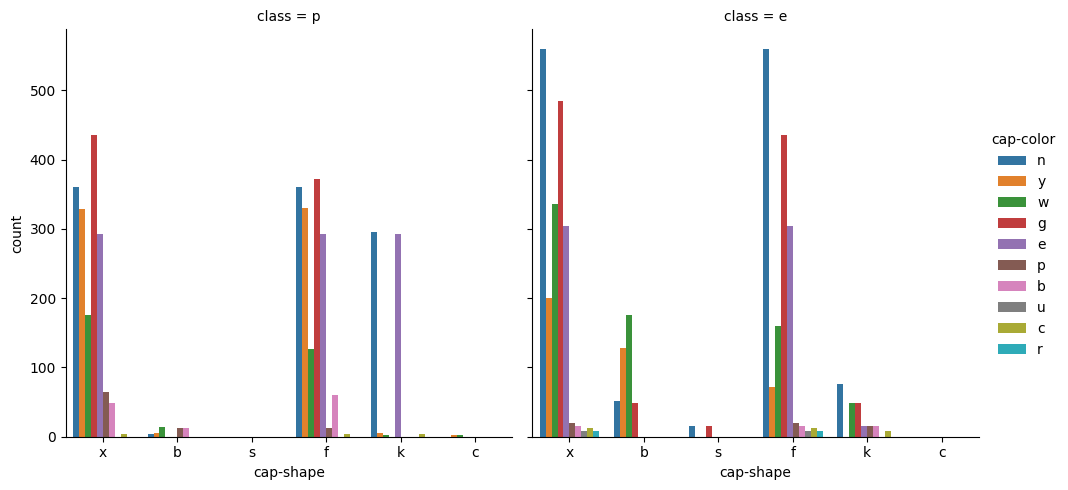

In [ ]:
plt.figure (figsize =  (14, 6))
graph = sns.catplot(x='cap-shape', hue='cap-color', col='class',
                    data=df, kind='count', height=5, aspect=1)

*1. จากกราฟพบว่าเห็ดสีขาวทรงระฆังหรือ (White Bell Shape Mushroom) นั้นพบได้น้อยในคลาสพิษ (p) ซึ่งบ่งชี้ว่า หากเราไปเจอเห็ดสีขาวทรงระฆัง ส่วนใหญ่นั้นก็มักจะกินได้ปลอดภัย*

*2. สำหรับเห็ดที่มีพิษจะเห็นได้เลยว่า เห็ดสีน้ำตาล (n) และเห็ดสีแดง (e) นั้นพบได้ในคลาสพิษ (p) อย่างมาก ซึ่งบ่งชี้ว่า หากเราไปเจอเห็ดสีน้ำตาลหรือสีแดง ส่วนใหญ่มักจะมีพิษ และไม่ค่อยแนะนำให้กิน*

<Figure size 1400x600 with 0 Axes>

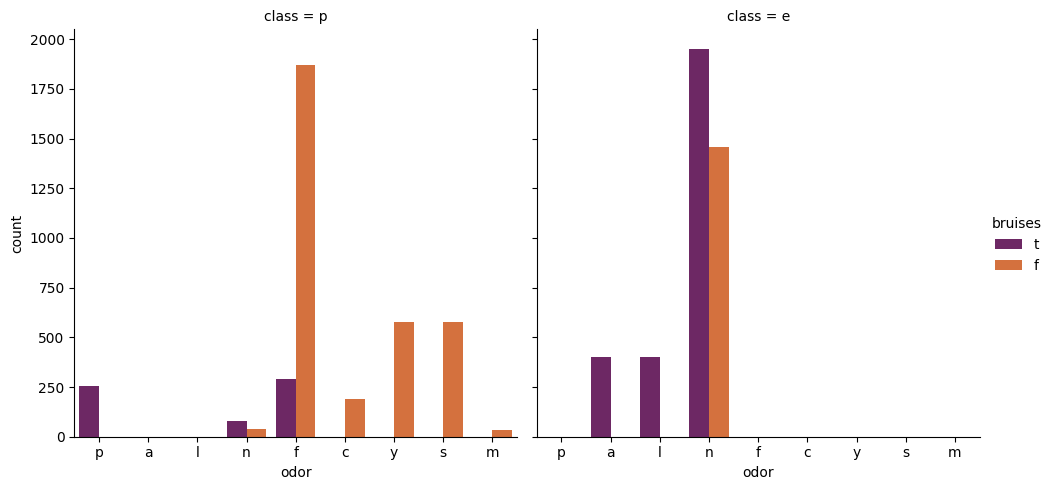

In [ ]:
# bruises = รอยช้ำ, odor = กลิ่น
plt.figure (figsize = (14, 6))
graph = sns.catplot(x = 'odor', hue = 'bruises', col = 'class',
                    data = df, kind = 'count',
                    height = 5, aspect = 1, palette = 'inferno')

*1. จากกราฟพบว่าเห็ดที่ไม่มีกลิ่นและมีรอยช้ำ หรือ Oderless and Bruised Mushroom นั้นปลอดภัยต่อการกินเมื่อพบเจอในป่า*

*2. จากกรากฟก็พบว่าอีกว่าเห็ดที่มีกลิ่นเหม็นและไม่มีรอยช้ำ หรือ Foul and no Bruised Mushroom นั้นส่วนใหญ่มักจะมีพิษ ไม่ปลอดภัยแก่การกินเมื่อพบเจอในป่า*

**DATA PREPROCESSING เริ่มทำ MODEL MACHINE LEARNING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# แปลงเฉพาะคอลัมน์ที่ 2 เป็นต้นไป
df.iloc[:, 1:] = df.iloc[:, 1:].apply(le.fit_transform)
# ดูข้อมูลตัวอย่าง
df.head()

#แปลงข้อมูลจาก dataframe ไปเป็น numerical data ไว้ใช้ในการทำ machine learning ต่อไป

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
x = df.drop(['class'], axis = 1) #สร้างตัวแปรเก็บ feature ของข้อมูล แล้วก็ลบคอลัมน์ class ซึ่งเป็นคำตอบออกไปจาก dataframe, axis = 1 คือการลบคอลัมน์ในแนวนอน
y = df['class'] #สร้างตัวแปรเป้าหมายหรือ 'target' ซึ่งก็คือคอลัมน์ class โดยที่ตัวแปร y คือสิ่งที่โมเดลเราจะทำนายว่ามันกินได้หรือเป็นพิษนั่นก็คือ e หรือ p

class_names = y.unique()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #แบ่งชุดข้อมูลทดสอบ (test set) ออกเป็น 30% ส่วนอีก 70% คือชุดข้อมูลฝึก (training set)

#x_train คือ feature สำหรับการฝึกโมเดล
#x_test คือ feature สำหรับการทดสอบโมเดล

#y_train คือ target สำหรับการฝึกโมเดล
#y_test คือ target สำหรับการทดสอบโมเดล

**DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5) #กำหนด max_depth เป็น 5 เพื่อไม่ให้มันซับซ้อนเกินไปเฉย ๆ แหละ ลดความเสี่ยงเกิดการ overfitting (ทดสอบจนหลอน)
dt.fit(x_train, y_train) #ฝึกโมเดลจาก x_train (ชุดข้อมูลที่จะให้โมเดลมันฝึก), y_train (ชุดคำตอบที่เอามาฝึกให้โมเดล)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.score(x_train, y_train) #ประเมินค่าความแม่นยำของโมเดล

0.9824129440731622

In [ ]:
prediction = dt.predict(x_test) #ลองให้โมเดลทำข้อสอบจากชุดข้อมูลทดสอบหรือ (x_test)
prediction

array(['e', 'e', 'e', ..., 'p', 'e', 'p'], dtype=object)

**Import Library for Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

[[1239    9]
 [  51 1139]]


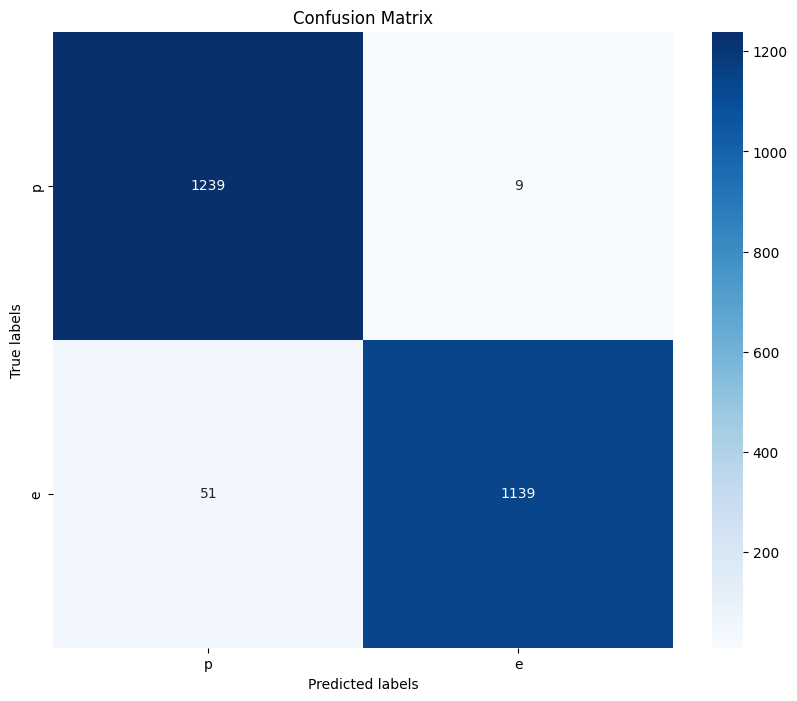

In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g' , xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

print(f'Accuracy: {accuracy:.4f}') #ความถูกต้องของการทำนายผลทั้งหมดของโมเดล
print(f'Precision: {precision:.4f}') #ความถูกต้องของประเด็นที่โมเดลสนใจที่จะทำนาย
print(f'Recall: {recall:.4f}') #สัดส่วนที่โมเดลสามารถทำนายประเด็นที่เราสนใจทั้งหมด
print(f'F1 Score: {f1:.4f}') #ค่าเฉลี่ยแบบ harmonic (harmonic mean) ของ Precision และ Recall ซึ่งจะทำให้ค่าที่ออกมาเป็นการวัดประสิทธิภาพของโมเดลด้วย 2 Metrics รวมกัน

Accuracy: 0.9754
Precision: 0.9763
Recall: 0.9750
F1 Score: 0.9753


**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)
rf.fit(x_train, y_train) #ฝึกโมเดลจาก x_train (ชุดข้อมูลที่จะให้โมเดลมันฝึก), y_train (ชุดคำตอบที่เอามาฝึกให้โมเดล)

RandomForestClassifier(max_depth=5)

In [ ]:
rf.score(x_train, y_train) #คำนวณค่าความแม่นยำหรือ accuracy ของโมเดลนี้

0.9919099542736546

In [ ]:
predictation = rf.predict(x_test) #ลองให้โมเดลทำข้อสอบจากชุดข้อมูลทดสอบหรือ (x_test)
rf.score(x_test, y_test)

0.9893355209187858

[[1248    0]
 [  26 1164]]


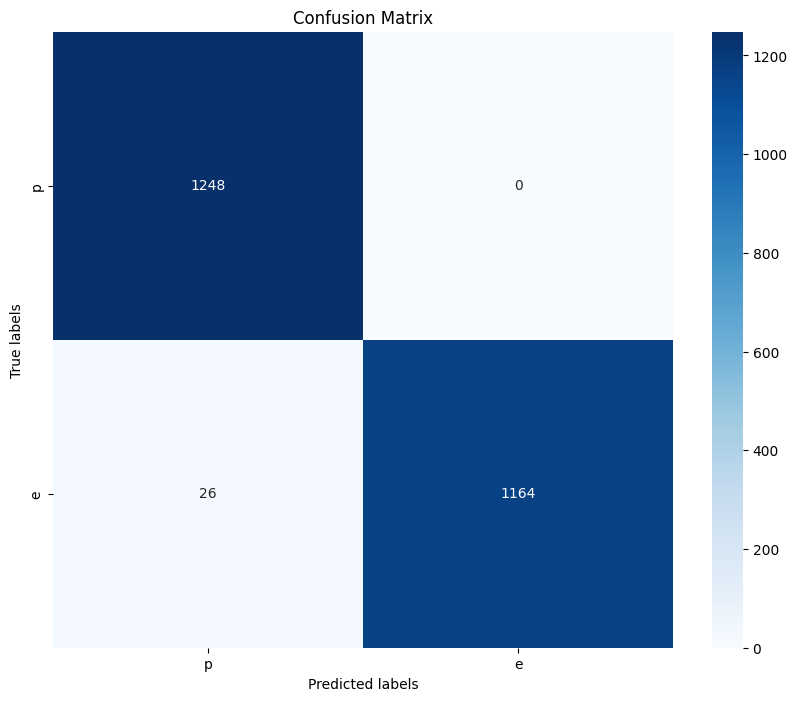

In [ ]:
cm = confusion_matrix(y_test, predictation)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g' , xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

print(f'Accuracy: {accuracy:.4f}') #ความถูกต้องของการทำนายผลทั้งหมดของโมเดล
print(f'Precision: {precision:.4f}') #ความถูกต้องของประเด็นที่โมเดลสนใจที่จะทำนาย
print(f'Recall: {recall:.4f}') #สัดส่วนที่โมเดลสามารถทำนายประเด็นที่เราสนใจทั้งหมด
print(f'F1 Score: {f1:.4f}') #ค่าเฉลี่ยแบบ harmonic (harmonic mean) ของ Precision และ Recall ซึ่งจะทำให้ค่าที่ออกมาเป็นการวัดประสิทธิภาพของโมเดลด้วย 2 Metrics รวมกัน

Accuracy: 0.9754
Precision: 0.9763
Recall: 0.9750
F1 Score: 0.9753


**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(C = 1.0, kernel = 'rbf') #มันคือพารามิเตอร์ที่ควบคุมการสมดุลระหว่างการทำให้โมเดลมีความแม่นยำในการทำนาย และช่วยลด overfitting หรือฝึกจนหลอนนั่นแหละ ส่วน rbf เป็นเคอร์เนลที่ใช้ในการทำ SVM เฉย ๆ
svm_model.fit(x_train, y_train) #จับชุดข้อมูลฝึกและคำตอบสำหรับการฝึกโยนลงไปให้มัน train

SVC()

In [ ]:
svm_model.score(x_train, y_train) #คำนวณค่าความแม่นยำหรือ accuracy ของโมเดลนี้

0.9889201547660922

In [ ]:
predictation = svm_model.predict(x_test) #ลองให้โมเดลทำข้อสอบจากชุดข้อมูลทดสอบหรือ (x_test)
svm_model.score(x_test, y_test)

0.9876948318293683

[[1247    1]
 [  29 1161]]


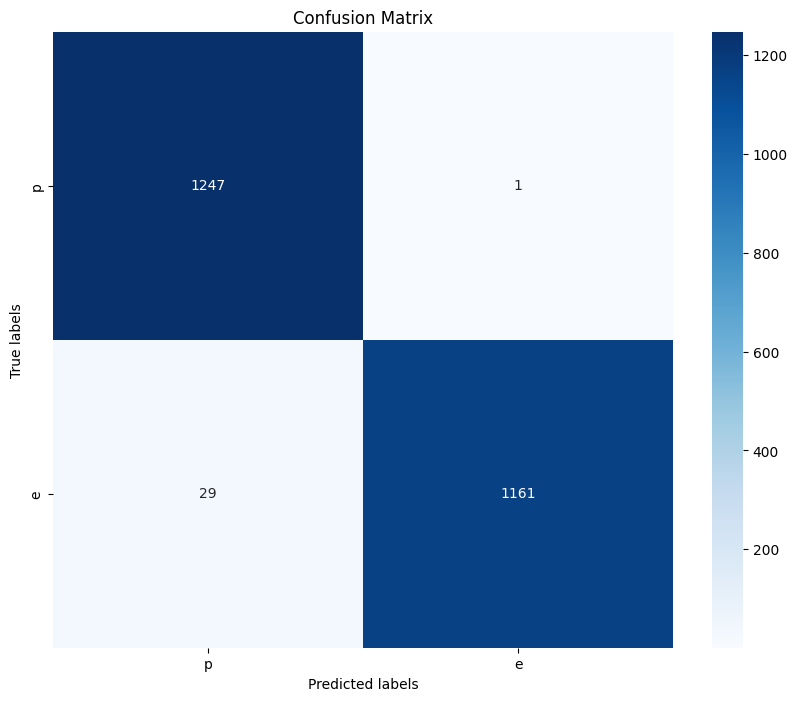

In [ ]:
cm = confusion_matrix(y_test, predictation)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g' , xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

print(f'Accuracy: {accuracy:.4f}') #ความถูกต้องของการทำนายผลทั้งหมดของโมเดล
print(f'Precision: {precision:.4f}') #ความถูกต้องของประเด็นที่โมเดลสนใจที่จะทำนาย
print(f'Recall: {recall:.4f}') #สัดส่วนที่โมเดลสามารถทำนายประเด็นที่เราสนใจทั้งหมด
print(f'F1 Score: {f1:.4f}') #ค่าเฉลี่ยแบบ harmonic (harmonic mean) ของ Precision และ Recall ซึ่งจะทำให้ค่าที่ออกมาเป็นการวัดประสิทธิภาพของโมเดลด้วย 2 Metrics รวมกัน

Accuracy: 0.9754
Precision: 0.9763
Recall: 0.9750
F1 Score: 0.9753
